In [1]:
# Load CIFAR-10 data set
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


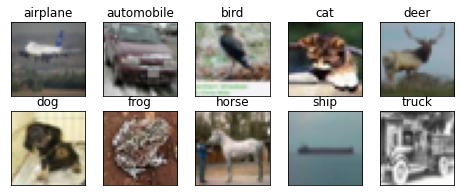

In [2]:
# Show examples from each class
import numpy as np
import matplotlib.pyplot as plt

num_classes = len(np.unique(y_train))
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    idx = np.where(y_train[:]==i)[0]
    features_idx = X_train[idx,::]
    rnd_img = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[rnd_img,::], (0, 1, 2))
    plt.imshow(im)
plt.show()

In [3]:
# Data pre-processing
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

In [4]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # Summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1,step=len(model_history.history['accuracy'])/10))
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1,step=len(model_history.history['loss'])/10))
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import experimental

def build_model_v1():
    model = Sequential([experimental.preprocessing.Rescaling(1./255, input_shape=(32, 32, 3)),
    experimental.preprocessing.RandomRotation(0.2),
    experimental.preprocessing.RandomZoom(.2),
    experimental.preprocessing.RandomFlip("horizontal")])

    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

def build_model_v2():
    model = Sequential([experimental.preprocessing.Rescaling(1./255, input_shape=(32, 32, 3)),
    experimental.preprocessing.RandomRotation(0.2),
    experimental.preprocessing.RandomZoom(.2),
    experimental.preprocessing.RandomFlip("horizontal")])

    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

def build_model_v3():
    model = Sequential([experimental.preprocessing.Rescaling(1./255, input_shape=(32, 32, 3)),
    experimental.preprocessing.RandomRotation(0.2),
    experimental.preprocessing.RandomZoom(.2),
    experimental.preprocessing.RandomFlip("horizontal")])

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

In [6]:
# Feed forward dense model
# Here it is not allowed to use convolutional layers
# You may use any regularizacion (see class slides)

model = build_model_v1()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 32, 32, 3)         0         
_________________________________________________________________
random_rotation (RandomRotat (None, 32, 32, 3)         0         
_________________________________________________________________
random_zoom (RandomZoom)     (None, 32, 32, 3)         0         
_________________________________________________________________
random_flip (RandomFlip)     (None, 32, 32, 3)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               393344    
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               5

Epoch 1/40
391/391 [==============================] - 8s 15ms/step - loss: 1.9193 - accuracy: 0.3148 - val_loss: 2.0878 - val_accuracy: 0.2096
Epoch 2/40
391/391 [==============================] - 4s 11ms/step - loss: 1.6942 - accuracy: 0.3952 - val_loss: 1.9615 - val_accuracy: 0.3021
Epoch 3/40
391/391 [==============================] - 4s 11ms/step - loss: 1.6476 - accuracy: 0.4132 - val_loss: 1.7333 - val_accuracy: 0.3927
Epoch 4/40
391/391 [==============================] - 4s 11ms/step - loss: 1.6162 - accuracy: 0.4209 - val_loss: 1.8802 - val_accuracy: 0.3430
Epoch 5/40
391/391 [==============================] - 4s 11ms/step - loss: 1.5951 - accuracy: 0.4308 - val_loss: 1.8717 - val_accuracy: 0.3499
Epoch 6/40
391/391 [==============================] - 4s 11ms/step - loss: 1.5546 - accuracy: 0.4483 - val_loss: 1.6701 - val_accuracy: 0.4013
Epoch 7/40
391/391 [==============================] - 4s 11ms/step - loss: 1.5408 - accuracy: 0.4481 - val_loss: 1.6885 - val_accuracy: 0.3915

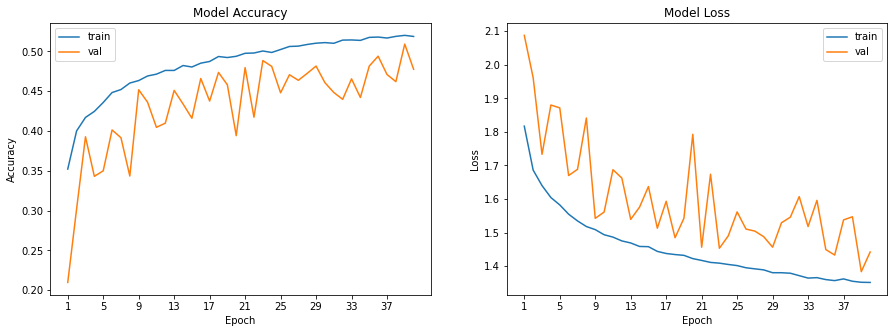

Training MLP took 172.1759054660797 seconds


In [7]:
# Training
import time
start = time.time()
history = model.fit(X_train, Y_train, batch_size=128, epochs=40, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

In [8]:
# Feed forward dense model
# Here it is not allowed to use convolutional layers
# You may use any regularizacion (see class slides)

model = build_model_v2()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
random_rotation_1 (RandomRot (None, 32, 32, 3)         0         
_________________________________________________________________
random_zoom_1 (RandomZoom)   (None, 32, 32, 3)         0         
_________________________________________________________________
random_flip_1 (RandomFlip)   (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               393344    
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)              

Epoch 1/40
391/391 [==============================] - 6s 12ms/step - loss: 2.1022 - accuracy: 0.2448 - val_loss: 2.2339 - val_accuracy: 0.1742
Epoch 2/40
391/391 [==============================] - 4s 11ms/step - loss: 1.7949 - accuracy: 0.3610 - val_loss: 1.8058 - val_accuracy: 0.3443
Epoch 3/40
391/391 [==============================] - 4s 11ms/step - loss: 1.7168 - accuracy: 0.3892 - val_loss: 1.8153 - val_accuracy: 0.3552
Epoch 4/40
391/391 [==============================] - 4s 11ms/step - loss: 1.6687 - accuracy: 0.4023 - val_loss: 1.7326 - val_accuracy: 0.3771
Epoch 5/40
391/391 [==============================] - 4s 11ms/step - loss: 1.6320 - accuracy: 0.4165 - val_loss: 1.8799 - val_accuracy: 0.3446
Epoch 6/40
391/391 [==============================] - 4s 11ms/step - loss: 1.6037 - accuracy: 0.4305 - val_loss: 1.9096 - val_accuracy: 0.3176
Epoch 7/40
391/391 [==============================] - 5s 12ms/step - loss: 1.5920 - accuracy: 0.4312 - val_loss: 1.7805 - val_accuracy: 0.3805

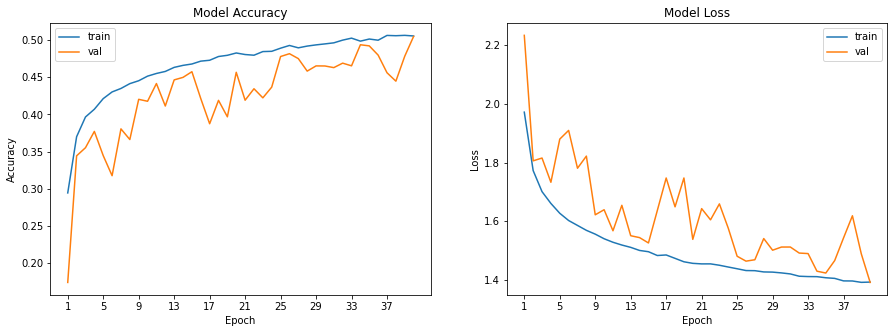

Training MLP took 185.11123061180115 seconds


In [9]:
# Training
import time
start = time.time()
history = model.fit(X_train, Y_train, batch_size=128, epochs=40, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

In [10]:
# Feed forward dense model
# Here it is not allowed to use convolutional layers
# You may use any regularizacion (see class slides)

model = build_model_v3()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
random_rotation_2 (RandomRot (None, 32, 32, 3)         0         
_________________________________________________________________
random_zoom_2 (RandomZoom)   (None, 32, 32, 3)         0         
_________________________________________________________________
random_flip_2 (RandomFlip)   (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
batch_normalization_6 (Batch (None, 1024)             

Epoch 1/40
391/391 [==============================] - 14s 29ms/step - loss: 1.9541 - accuracy: 0.3008 - val_loss: 2.3949 - val_accuracy: 0.1690
Epoch 2/40
391/391 [==============================] - 11s 28ms/step - loss: 1.6954 - accuracy: 0.3956 - val_loss: 1.8731 - val_accuracy: 0.3418
Epoch 3/40
391/391 [==============================] - 11s 28ms/step - loss: 1.6254 - accuracy: 0.4207 - val_loss: 1.6798 - val_accuracy: 0.4006
Epoch 4/40
391/391 [==============================] - 10s 27ms/step - loss: 1.5706 - accuracy: 0.4374 - val_loss: 1.7480 - val_accuracy: 0.3764
Epoch 5/40
391/391 [==============================] - 10s 27ms/step - loss: 1.5387 - accuracy: 0.4488 - val_loss: 1.6248 - val_accuracy: 0.4147
Epoch 6/40
391/391 [==============================] - 11s 28ms/step - loss: 1.5073 - accuracy: 0.4644 - val_loss: 1.6549 - val_accuracy: 0.4104
Epoch 7/40
391/391 [==============================] - 11s 29ms/step - loss: 1.4977 - accuracy: 0.4634 - val_loss: 1.8198 - val_accuracy:

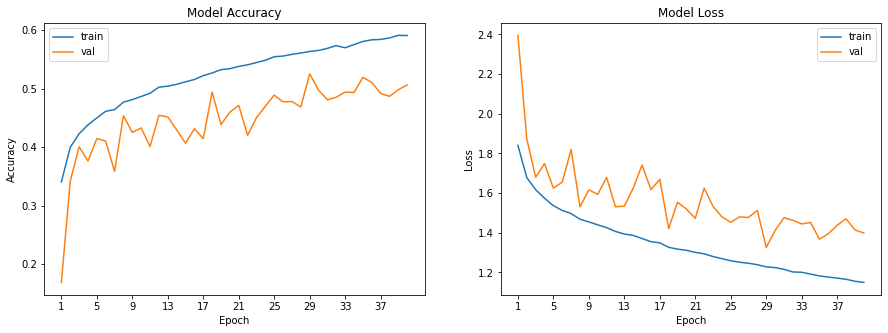

Training MLP took 496.58386754989624 seconds


In [11]:
# Training
import time
start = time.time()
history = model.fit(X_train, Y_train, batch_size=128, epochs=40, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

Definición de una red convolucional multicapa

In [12]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Flatten, Input, BatchNormalization, Conv2D, MaxPooling2D

def create_block(block_input, n_filtros):
    x = block_input
    for i in range(2):
        x = Conv2D(n_filtros, kernel_size=(3,3), padding="same")(x)
        x = Activation("relu")(x)
        x = BatchNormalization()(x)
    return x

def build_conv(): # De https://www.kaggle.com/mahtabshaan/autoencoder-as-feature-extractor-cifar10
    net_input = Input((32,32,3))

    block1 = create_block(net_input, 32)
    x = MaxPooling2D(pool_size=(2, 2))(block1)

    block2 = create_block(x, 64)
    x = MaxPooling2D(pool_size=(2, 2))(block2)

    block3 = create_block(x, 128)
    x = MaxPooling2D(pool_size=(2, 2))(block3)

    x = Flatten()(x)
    output = Dense(10, activation='softmax')(x)
    return Model(net_input, output)


In [13]:
# Convolutional Neural Network (CNN)
# Here you are allowed to use convolutional layers
# You may use also any regularizacion (see class slides)

import keras.backend as K

model = build_conv()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 32, 32, 32)        128   

Epoch 1/20
98/98 [==============================] - 200s 2s/step - loss: 1.8796 - accuracy: 0.4110 - val_loss: 2.9727 - val_accuracy: 0.1124
Epoch 2/20
98/98 [==============================] - 203s 2s/step - loss: 0.9855 - accuracy: 0.6545 - val_loss: 2.9708 - val_accuracy: 0.1437
Epoch 3/20
98/98 [==============================] - 208s 2s/step - loss: 0.7409 - accuracy: 0.7448 - val_loss: 2.7674 - val_accuracy: 0.2654
Epoch 4/20
98/98 [==============================] - 208s 2s/step - loss: 0.5637 - accuracy: 0.8066 - val_loss: 2.5914 - val_accuracy: 0.3272
Epoch 5/20
98/98 [==============================] - 211s 2s/step - loss: 0.4389 - accuracy: 0.8515 - val_loss: 1.4512 - val_accuracy: 0.5376
Epoch 6/20
98/98 [==============================] - 250s 3s/step - loss: 0.3379 - accuracy: 0.8882 - val_loss: 0.8765 - val_accuracy: 0.7063
Epoch 7/20
98/98 [==============================] - 282s 3s/step - loss: 0.2384 - accuracy: 0.9251 - val_loss: 0.9283 - val_accuracy: 0.7088
Epoch 8/20
98

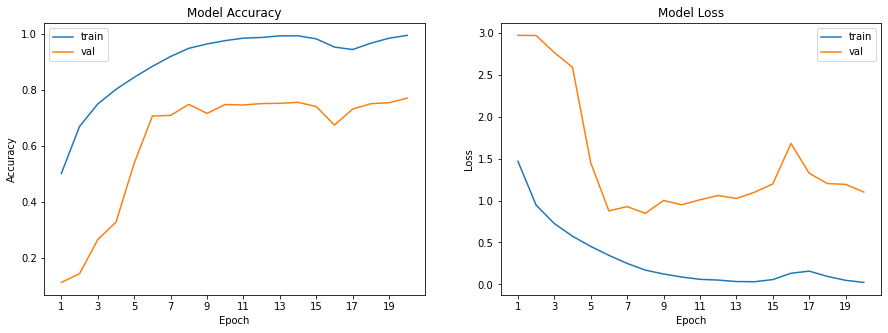

Training MLP took 3775.01389670372 seconds


In [14]:
# Training
import time
start = time.time()
history = model.fit(X_train, Y_train, batch_size=512, epochs=20, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")